# Centroid Generation Methods for CVTArchive

_This tutorial is part of the series of pyribs tutorials! See [here](https://docs.pyribs.org/en/latest/tutorials.html) for the list of all tutorials and the order in which they should be read._

In the [CVTArchive](https://docs.pyribs.org/en/latest/api/ribs.archives.CVTArchive.html), the cells are defined by centroids, which are points in measure space that form the center of each cell. By default, centroids are generated by sampling points within the bounds of the measure space and performing $k$-means clustering on them. This tutorial dives a bit deeper into centroid generation and demonstrates several alternative methods.

## Setup

In [ ]:
%pip install ribs[visualize]

In [ ]:
import numpy as np

from ribs.archives import CVTArchive
from ribs.visualize import cvt_archive_heatmap

## Default Centroid Generation

As mentioned above, the default centroid generation method involves running $k$-means clustering on randomly sampled points in the measure space. We can create and visualize the cells in such an archive as follows.

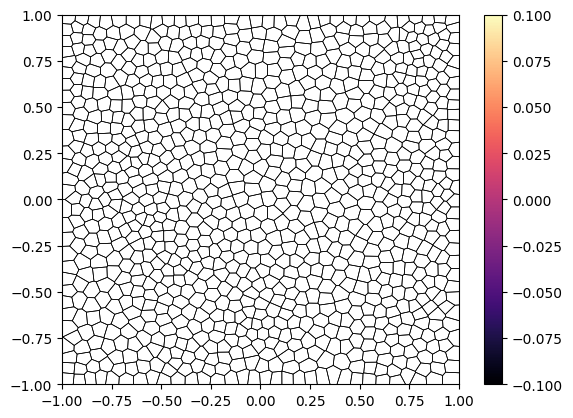

In [3]:
archive = CVTArchive(
    solution_dim=10,
    cells=1000,
    ranges=[(-1, 1), (-1, 1)],
)

cvt_archive_heatmap(archive)

We can also view the centroids with the `plot_centroids` parameter:

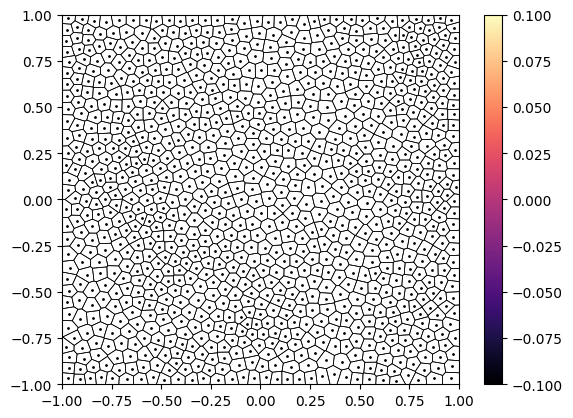

In [4]:
cvt_archive_heatmap(archive, plot_centroids=True)

## Manually Passing in Centroids

In addition to automatically generating centroids, it is possible to pass them in manually via the `custom_centroids` parameter:

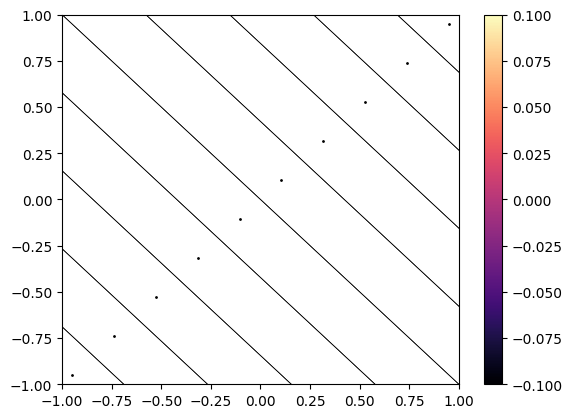

In [5]:
centroids = np.stack(
    (np.linspace(-0.95, 0.95, 10), np.linspace(-0.95, 0.95, 10)), axis=1
)

archive = CVTArchive(
    solution_dim=10,
    cells=10,
    ranges=[(-1, 1), (-1, 1)],
    custom_centroids=centroids,
)

cvt_archive_heatmap(archive, plot_centroids=True)

This can be useful, for instance, if we would like to reuse centroids across archives. Here, `custom_centroids` is set to `archive.centroids`:

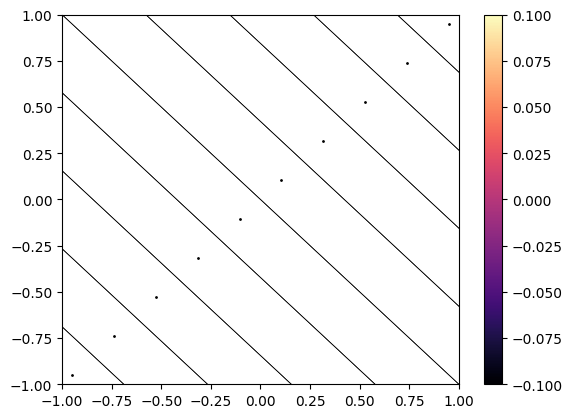

In [6]:
archive2 = CVTArchive(
    solution_dim=10,
    cells=10,
    ranges=[(-1, 1), (-1, 1)],
    custom_centroids=archive.centroids,
)

cvt_archive_heatmap(archive2, plot_centroids=True)

## Alternative Generation Methods

[Mouret 2023](https://dl.acm.org/doi/pdf/10.1145/3583133.3590726) present alternatives to the aforementioned $k$-means clustering approach. Here we show how to integrate those methods with the CVTArchive.

### Random Sampling

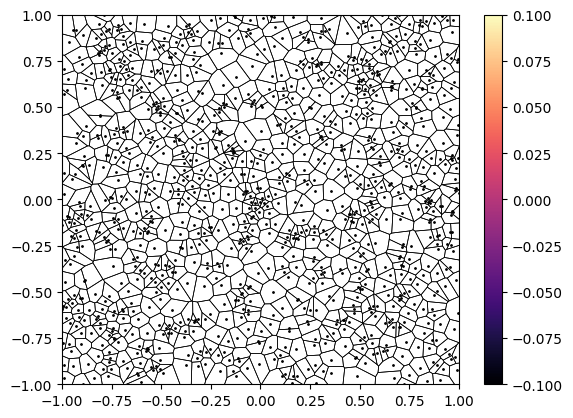

In [7]:
seed = 42
rng = np.random.default_rng(seed)
centroids = rng.uniform(
    # Note that the ranges here are lower bounds and then upper bounds, while the
    # archive ranges argument expects a range for each measure dimension. That is
    # to say, these are [-1, -1] and [1, 1], instead of [-1, 1] and [-1, 1].
    [-1, -1],
    [1, 1],
    size=(1000, 2),
)

archive = CVTArchive(
    solution_dim=10,
    cells=1000,
    ranges=[(-1, 1), (-1, 1)],
    custom_centroids=centroids,
)

cvt_archive_heatmap(archive, plot_centroids=True)

### Sobol Sampling

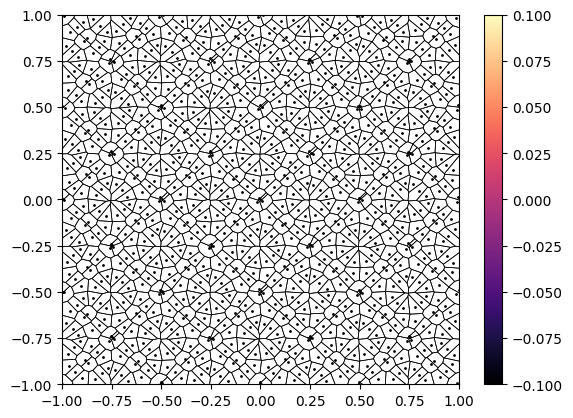

In [8]:
from scipy.stats.qmc import Sobol

# Generates centroids with a Sobol sequence --- Sobol sequences expect n to be a
# power of 2, so this uses 1024 cells instead of 1000. Also, d=2 refers to the
# dimensionality of the measure space.
sampler = Sobol(d=2, scramble=False)
sobol_nums = sampler.random(n=1024)
# Similar to the random centroids example, we use the bounds of the archive
# here, rather than the ranges.
centroids = np.asarray([-1, -1]) + sobol_nums * (
    np.asarray([1, 1]) - np.asarray([-1, -1])
)

archive = CVTArchive(
    solution_dim=10,
    cells=1024,
    ranges=[(-1, 1), (-1, 1)],
    custom_centroids=centroids,
)

cvt_archive_heatmap(archive, plot_centroids=True)

### Scrambled Sobol Sampling

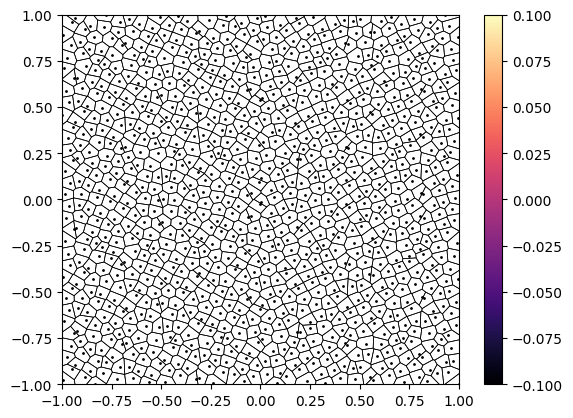

In [9]:
from scipy.stats.qmc import Sobol

# Generates centroids as a scrambled Sobol sequence. This is identical to the
# last example, but with scramble=True now.
seed = 42
sampler = Sobol(d=2, scramble=True, rng=seed)
sobol_nums = sampler.random(n=1024)
centroids = np.asarray([-1, -1]) + sobol_nums * (
    np.asarray([1, 1]) - np.asarray([-1, -1])
)

archive = CVTArchive(
    solution_dim=10,
    cells=1024,
    ranges=[(-1, 1), (-1, 1)],
    custom_centroids=centroids,
)

cvt_archive_heatmap(archive, plot_centroids=True)

### Halton Sequence

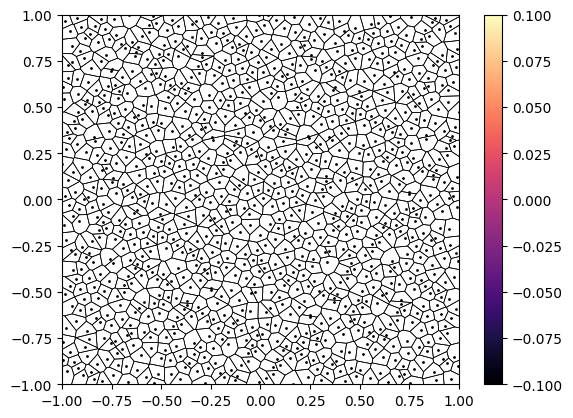

In [10]:
from scipy.stats.qmc import Halton

# Generates centroids with a Halton sequence.
seed = 42
sampler = Halton(d=2, rng=seed)
halton_nums = sampler.random(n=1000)
centroids = np.asarray([-1, -1]) + halton_nums * (
    np.asarray([1, 1]) - np.asarray([-1, -1])
)

archive = CVTArchive(
    solution_dim=10,
    cells=1000,
    ranges=[(-1, 1), (-1, 1)],
    custom_centroids=centroids,
)

cvt_archive_heatmap(archive, plot_centroids=True)